# Brain Tumor Classification

Download dataset from: https://www.kaggle.com/datasets/bilalakgz/brain-tumor-mri-dataset

## Data Preprocessing

Check image sizes:

In [1]:
import os
import numpy as np
import cv2

def get_image_sizes(folder_path: str):
    sizes = {}

    for filename in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img.shape not in sizes:
                sizes[img.shape] = 1
            else:
                sizes[img.shape] += 1
        except Exception as e:
            print(f"Error opening {filename}: {e}")

    return sizes

print(get_image_sizes("./brain_tumor_dataset/brain_tumor_classification/Training/no_tumor"))
print(get_image_sizes("./brain_tumor_dataset/brain_tumor_classification/Training/glioma_tumor"))
print(get_image_sizes("./brain_tumor_dataset/brain_tumor_classification/Training/meningioma_tumor"))
print(get_image_sizes("./brain_tumor_dataset/brain_tumor_classification/Training/pituitary_tumor"))

{(509, 452, 3): 1, (1024, 1024, 3): 2, (213, 226, 3): 1, (350, 350, 3): 10, (215, 235, 3): 1, (273, 251, 3): 1, (229, 235, 3): 2, (872, 850, 3): 2, (218, 233, 3): 1, (236, 236, 3): 46, (227, 235, 3): 4, (406, 331, 3): 1, (221, 228, 3): 2, (269, 236, 3): 4, (244, 235, 3): 1, (781, 733, 3): 1, (222, 212, 3): 1, (310, 329, 3): 1, (243, 203, 3): 1, (480, 853, 3): 3, (223, 236, 3): 1, (686, 626, 3): 1, (261, 235, 3): 1, (512, 416, 3): 3, (208, 233, 3): 1, (630, 630, 3): 14, (417, 428, 3): 3, (225, 225, 3): 22, (202, 216, 3): 1, (496, 411, 3): 1, (442, 442, 3): 10, (508, 470, 3): 1, (228, 236, 3): 1, (257, 236, 3): 2, (264, 210, 3): 1, (442, 409, 3): 1, (232, 236, 3): 1, (484, 405, 3): 1, (361, 642, 3): 1, (750, 750, 3): 1, (248, 200, 3): 1, (488, 504, 3): 1, (231, 218, 3): 1, (225, 234, 3): 2, (501, 411, 3): 1, (540, 504, 3): 1, (220, 236, 3): 2, (501, 456, 3): 1, (280, 229, 3): 1, (424, 417, 3): 1, (295, 236, 3): 2, (480, 852, 3): 2, (1446, 1375, 3): 1, (278, 208, 3): 1, (512, 512, 3): 5, 

Resize images to a consistent size and save them in new folders:

In [2]:
import os
import cv2

def resize_images(input_path: str, output_path: str, target_size: tuple[int, int]):
    if os.path.exists(output_path):
        print(f"Error: Folder {output_path} already exists.")
    else:
        os.makedirs(output_path)

        for filename in os.listdir(input_path):
            try:
                img_path = os.path.join(input_path, filename)
                img = cv2.imread(img_path)
                resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
                save_path = os.path.join(output_path, filename)
                cv2.imwrite(save_path, resized_img)
            except Exception as e:
                print(f"Error opening {filename}: {e}")


target_size = (244, 244)

# Resize train dataset
resize_images("./brain_tumor_dataset/brain_tumor_classification/Training/no_tumor", "./brain_tumor_dataset/brain_tumor_classification/Training_Resize/no_tumor", target_size)
resize_images("./brain_tumor_dataset/brain_tumor_classification/Training/glioma_tumor", "./brain_tumor_dataset/brain_tumor_classification/Training_Resize/glioma_tumor", target_size)
resize_images("./brain_tumor_dataset/brain_tumor_classification/Training/meningioma_tumor", "./brain_tumor_dataset/brain_tumor_classification/Training_Resize/meningioma_tumor", target_size)
resize_images("./brain_tumor_dataset/brain_tumor_classification/Training/pituitary_tumor", "./brain_tumor_dataset/brain_tumor_classification/Training_Resize/pituitary_tumor", target_size)

# Resize test dataset
resize_images("./brain_tumor_dataset/brain_tumor_classification/Testing/no_tumor", "./brain_tumor_dataset/brain_tumor_classification/Testing_Resize_Final/no_tumor", target_size)
resize_images("./brain_tumor_dataset/brain_tumor_classification/Testing/glioma_tumor", "./brain_tumor_dataset/brain_tumor_classification/Testing_Resize_Final/glioma_tumor", target_size)
resize_images("./brain_tumor_dataset/brain_tumor_classification/Testing/meningioma_tumor", "./brain_tumor_dataset/brain_tumor_classification/Testing_Resize_Final/meningioma_tumor", target_size)
resize_images("./brain_tumor_dataset/brain_tumor_classification/Testing/pituitary_tumor", "./brain_tumor_dataset/brain_tumor_classification/Testing_Resize_Final/pituitary_tumor", target_size)


Error: Folder ./brain_tumor_dataset/brain_tumor_classification/Training_Resize/no_tumor already exists.
Error: Folder ./brain_tumor_dataset/brain_tumor_classification/Training_Resize/glioma_tumor already exists.
Error: Folder ./brain_tumor_dataset/brain_tumor_classification/Training_Resize/meningioma_tumor already exists.
Error: Folder ./brain_tumor_dataset/brain_tumor_classification/Training_Resize/pituitary_tumor already exists.
Error: Folder ./brain_tumor_dataset/brain_tumor_classification/Testing_Resize_Final/no_tumor already exists.
Error: Folder ./brain_tumor_dataset/brain_tumor_classification/Testing_Resize_Final/glioma_tumor already exists.
Error: Folder ./brain_tumor_dataset/brain_tumor_classification/Testing_Resize_Final/meningioma_tumor already exists.
Error: Folder ./brain_tumor_dataset/brain_tumor_classification/Testing_Resize_Final/pituitary_tumor already exists.


Visualize Data. Look at sample original image and resized image:

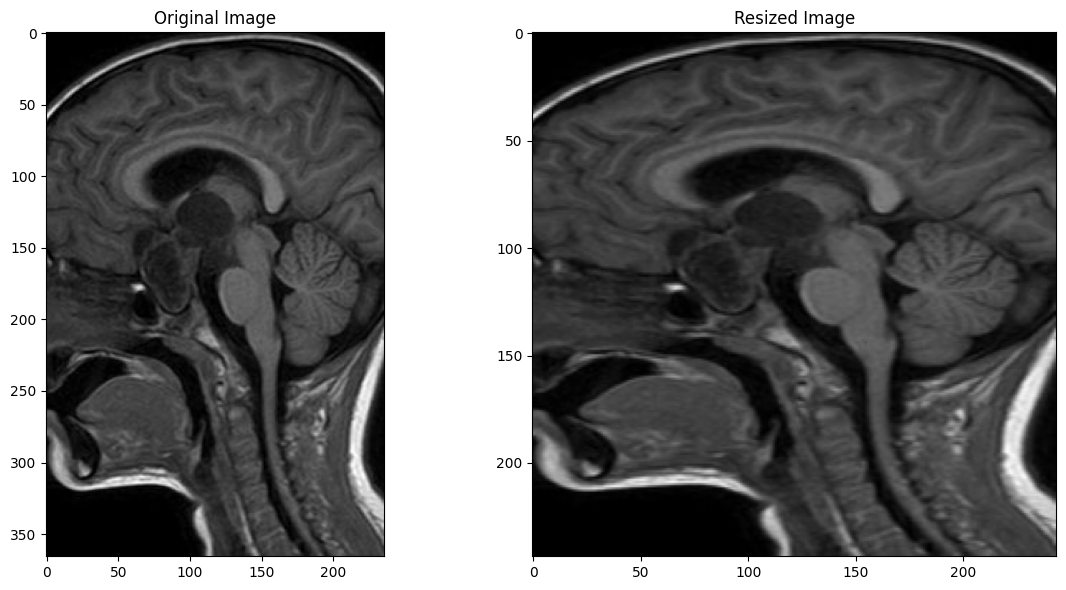

In [3]:
import os, random
from PIL import Image
import matplotlib.pyplot as plt

folder_path1 = "./brain_tumor_dataset/brain_tumor_classification/Training/no_tumor"
folder_path2 = "./brain_tumor_dataset/brain_tumor_classification/Training_Resize/no_tumor"

filename = random.choice(os.listdir(folder_path1))
img_path1 = os.path.join(folder_path1, filename)
img_path2 = os.path.join(folder_path2, filename)
img1 = Image.open(img_path1)
img2 = Image.open(img_path2)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(img1)
axes[0].set_title("Original Image")

axes[1].imshow(img2)
axes[1].set_title("Resized Image")

plt.tight_layout()
plt.show()

Determine dataset size.

In [4]:
import os

train_folder = "./brain_tumor_dataset/brain_tumor_classification/Training_Resize"
test_folder = "./brain_tumor_dataset/brain_tumor_classification/Testing_Resize_Final"

num_train = 0
for folder in os.listdir(train_folder):
    num_train += len(os.listdir(os.path.join(train_folder, folder)))

num_test = 0
for folder in os.listdir(test_folder):
    num_test += len(os.listdir(os.path.join(test_folder, folder)))

total = num_train + num_test

print(f"Train dataset size: {num_train}, {num_train/total}")
print(f"Test dataset size: {num_test}, {num_test/total}")

Train dataset size: 2870, 0.8792892156862745
Test dataset size: 394, 0.12071078431372549


Allocate images to validation/development dataset.

In [5]:
import os
import shutil
from sklearn.model_selection import train_test_split

train_path = "./brain_tumor_dataset/brain_tumor_classification/Training_Resize_Final"
val_path = "./brain_tumor_dataset/brain_tumor_classification/Validation_Resize_Final"
input_path = "./brain_tumor_dataset/brain_tumor_classification/Training_Resize"

if not os.path.exists(train_path) and not os.path.exists(val_path):
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(val_path, exist_ok=True)

    for folder in os.listdir(input_path):
        input_subfolder_path = os.path.join(input_path, folder)
        train_subfolder_path = os.path.join(train_path, folder)
        val_subfolder_path = os.path.join(val_path, folder)

        os.makedirs(train_subfolder_path)
        os.makedirs(val_subfolder_path)
        files = os.listdir(input_subfolder_path)

        train_files, val_files = train_test_split(files, test_size=0.2, stratify=None, random_state=42)

        for filename in train_files:
            shutil.copy(os.path.join(input_subfolder_path, filename), os.path.join(train_subfolder_path, filename))

        for filename in val_files:
            shutil.copy(os.path.join(input_subfolder_path, filename), os.path.join(val_subfolder_path, filename))

    print("Split successful.")
else:
    print("Error: Paths already exist. No processing occurred.")

Error: Paths already exist. No processing occurred.


Reanalyze dataset size.

In [6]:
import os

train_folder = "./brain_tumor_dataset/brain_tumor_classification/Training_Resize_Final"
val_folder = "./brain_tumor_dataset/brain_tumor_classification/Validation_Resize_Final"
test_folder = "./brain_tumor_dataset/brain_tumor_classification/Testing_Resize_Final"

num_train = 0
for folder in os.listdir(train_folder):
    num_train += len(os.listdir(os.path.join(train_folder, folder)))

num_val = 0
for folder in os.listdir(val_folder):
    num_val += len(os.listdir(os.path.join(val_folder, folder)))

num_test = 0
for folder in os.listdir(test_folder):
    num_test += len(os.listdir(os.path.join(test_folder, folder)))

total = num_train + num_val + num_test

print(f"Train dataset size: {num_train}, {num_train/total}")
print(f"Validation dataset size: {num_val}, {num_val/total}")
print(f"Test dataset size: {num_test}, {num_test/total}")

Train dataset size: 2294, 0.7028186274509803
Validation dataset size: 576, 0.17647058823529413
Test dataset size: 394, 0.12071078431372549


Create PyTorch dataset class

In [7]:
from torch.utils.data import Dataset
import torch
import cv2

class TumorDataset(Dataset):
    def __init__(self, img_dir: str, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.classes = sorted(os.listdir(img_dir))

        # Add all image paths and corresponding labels to lists
        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(img_dir, class_name)
            for filename in os.listdir(class_path):
                self.image_paths.append(os.path.join(class_path, filename))
                self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if self.transform:
            img = self.transform(image=img)['image']
        
        img = torch.tensor(img, dtype=torch.float32).permute(2, 0, 1)

        return img, label

Create data augmentations

In [ ]:
import albumentations as A

train_transforms = A.Compose([
    A.RandomRotate90(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=45, p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.GaussNoise(p=0.2),
    A.ElasticTransform(p=0.2),
    A.CoarseDropout(max_holes=8, max_height=0.1, max_width=0.1, p=0.3),
    A.GaussianBlur(blur_limit=(3, 7), p=0.2),
    A.RandomGamma(gamma_limit=(80, 120), p=0.2),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, p=0.2),
    A.Normalize()
])

val_transforms = A.Compose([
    A.Normalize()
])

/tmp/ipykernel_734666/1588380717.py:11: UserWarning: Argument 'fill_value' is not valid and will be ignored.
  A.CoarseDropout(max_holes=8, max_height=0.1, max_width=0.1, fill_value=0, p=0.3),


Create datasets and data loaders

In [9]:
from torch.utils.data import DataLoader

batch_size = 256

train_dataset = TumorDataset("./brain_tumor_dataset/brain_tumor_classification/Training_Resize_Final", transform=train_transforms)
val_dataset = TumorDataset("./brain_tumor_dataset/brain_tumor_classification/Validation_Resize_Final", transform=val_transforms)
test_dataset = TumorDataset("./brain_tumor_dataset/brain_tumor_classification/Testing_Resize_Final", transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# Define and Train Model

Define model

In [10]:
import torch
import torchvision

def get_model():
    # ResNet
    # model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet34', pretrained=False)
    # EfficientNet
    model = torchvision.models.efficientnet_b7(weights=torchvision.models.EfficientNet_B7_Weights.IMAGENET1K_V1).cuda()

    for param in model.parameters():
        param.requires_grad = False

    model.classifier = torch.nn.Sequential(
        torch.nn.Dropout(0.5).cuda(),
        torch.nn.Linear(model.classifier[1].in_features, 4).cuda()
    ).cuda()

    return model

Train model

In [11]:
import torch
import numpy as np

PATH = './models/model16.pth'
model = get_model()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

num_epochs = 150
min_val_loss = np.inf
min_val_loss_epoch = 0

train_losses = []
val_losses = []
for epoch in range(num_epochs):
    # Training step
    model.train()
    train_loss = 0
    for img, label in train_loader:
        img = img.cuda()
        label = label.cuda()
        optimizer.zero_grad()
        outputs = model(img)
        loss = criterion(outputs, label)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation step
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for img, label in val_loader:
            img = img.cuda()
            label = label.cuda()

            outputs = model(img)
            loss = criterion(outputs, label)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    # Save best model based off of validation loss
    if val_loss < min_val_loss:
        min_val_loss = val_loss
        min_val_loss_epoch = epoch + 1
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, PATH)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Validation Loss: {val_loss}")

Epoch 1/150, Train Loss: 1.3905115789837308, Validation Loss: 1.344115138053894
Epoch 2/150, Train Loss: 1.3697767522599962, Validation Loss: 1.3218540747960408
Epoch 3/150, Train Loss: 1.3515154123306274, Validation Loss: 1.3144239981969197
Epoch 4/150, Train Loss: 1.327399902873569, Validation Loss: 1.2942773501078289
Epoch 5/150, Train Loss: 1.3126067850324843, Validation Loss: 1.275579571723938
Epoch 6/150, Train Loss: 1.2980968157450359, Validation Loss: 1.2682178417841594
Epoch 7/150, Train Loss: 1.2789835929870605, Validation Loss: 1.2470616102218628
Epoch 8/150, Train Loss: 1.2722620964050293, Validation Loss: 1.2332746585210164
Epoch 9/150, Train Loss: 1.2555704646640353, Validation Loss: 1.210452953974406
Epoch 10/150, Train Loss: 1.2366997533374362, Validation Loss: 1.204548954963684
Epoch 11/150, Train Loss: 1.2276091310713027, Validation Loss: 1.172163764635722
Epoch 12/150, Train Loss: 1.2159507274627686, Validation Loss: 1.1536751985549927
Epoch 13/150, Train Loss: 1.206

Plot train and validation loss

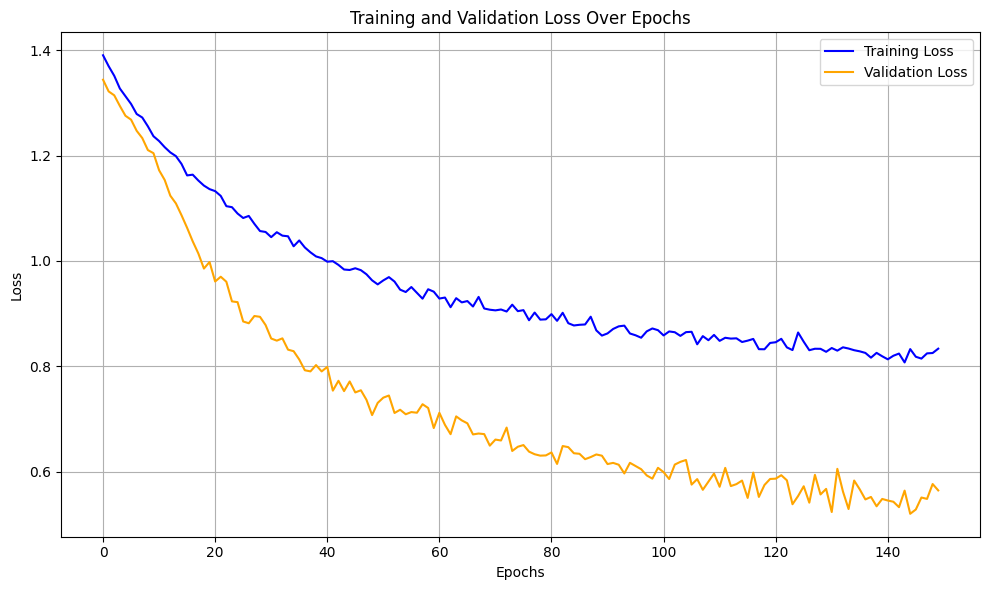

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Evaluate Model

Load best model based on validation loss

In [15]:
model = get_model()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
checkpoint = torch.load(PATH, weights_only=True)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

Overall Accuracy: 53.55%


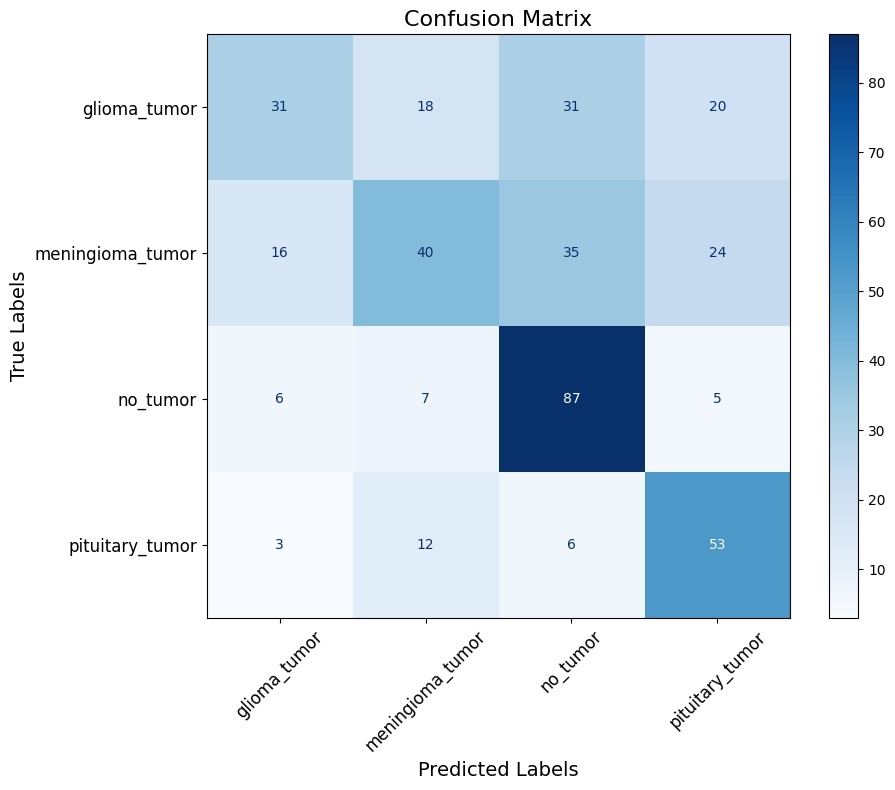

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for img, label in test_loader:
        img = img.cuda()
        label = label.cuda()

        outputs = model(img)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(label.cpu().numpy())

# Calculate accuracy
correct = np.sum(np.array(all_preds) == np.array(all_labels))
total = len(all_labels)
accuracy = correct / total * 100
print(f"Overall Accuracy: {accuracy:.2f}%")

# Calculate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=test_loader.dataset.classes)
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)

plt.tight_layout()
plt.show()

## Models Trained:
1. Resnet 34: 73.1% x
2. Resnet 34, data augmentations: 65.23% x
3. Resnet 50: 68.53% x
4. Resnet 50, data augmentations: 71.83% x
5. Resnet 34, normalized: 65.99%
6. Resnet 34, normalized, data augmentations: 67.01%
7. Resnet 50, normalized: 70.05%
8. Resnet 50, normalized, data augmentations: 67.51%
9. Resnet 34, normalized, data augmentations, dropout: 70.05%
10. Resnet 50, normalized, data augmentations, dropout: 67.77%
11. EfficientNetB1, normalized, data augmentations, dropout: 75.13%
12. EfficientNetB2, normalized, data augmentations, dropout: 74.62%
13. EfficientNetB4, normalized, data augmentations, dropout: 73.86%
14. EfficientNetB0, normalized, data augmentations, dropout: 76.90%
15. EfficientNetB7, normalized, data augmentations, dropout, pretrained weights: 79.44% 
16. EfficientNetB7, normalized, data augmentations, dropout, pretrained weights, freeze: 53.55%